# 1. importing required packages

In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

# 2.Reading the Dataset and understanding the data

In [4]:
bike_df = pd.read_csv("day - day.csv")
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
#check the shape
bike_df.shape

(730, 16)

In [6]:
#check dataframe for null and datatype 
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
#check the details of numeriacl data
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
#check the columns of data
bike_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [9]:
#check the size of data
bike_df.size

11680

In [10]:
#check the values of data
bike_df.values

array([[1, '01-01-2018', 1, ..., 331, 654, 985],
       [2, '02-01-2018', 1, ..., 131, 670, 801],
       [3, '03-01-2018', 1, ..., 120, 1229, 1349],
       ...,
       [728, '29-12-2019', 1, ..., 159, 1182, 1341],
       [729, '30-12-2019', 1, ..., 364, 1432, 1796],
       [730, '31-12-2019', 1, ..., 439, 2290, 2729]], dtype=object)

There are 730 rows and 16 columns in the data set. There are no null values in any of the columns.

# 3. Cleaning the data

In [11]:
bike_df.head(20)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


Droping unwanted columns

In [12]:
# Droping instant column as it is index column which has nothing to do with target
bike_df.drop(['instant'], axis = 1, inplace = True)

# Dropping dteday as we have already have month and weekday columns to work with
bike_df.drop(['dteday'], axis = 1, inplace = True)

# Dropping casual and registered columnsa as as we have cnt column which is sum of the both that is the target column

bike_df.drop(['casual'], axis = 1, inplace = True)
bike_df.drop(['registered'], axis = 1, inplace = True)

In [13]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [15]:
#from the data we found that columns season,wethersit,workingday
bike_df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [16]:
bike_df.weathersit.value_counts()


1    463
2    246
3     21
Name: weathersit, dtype: int64

In [17]:
bike_df.workingday.value_counts()

1    504
0    226
Name: workingday, dtype: int64

In [18]:
#finding the correlation between data 
bike_df.corr()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,0.004012,0.017868,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,0.000685,-0.011852,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,-0.004059,-0.010414,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.020145,-0.257009,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,4.012478e-03,6.852851e-04,-4.059002e-03,-0.020145,1.000000,0.001588,0.034216,0.044876,0.037964,0.008780,-0.017230,0.036183
workingday,1.786841e-02,-1.185197e-02,-1.041372e-02,-0.257009,0.001588,1.000000,-0.026332,0.002044,0.010657,0.053770,-0.002453,-0.027640
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.034216,-0.026332,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,0.044876,0.002044,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,0.037964,0.010657,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,0.008780,0.053770,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


we can see that features like season, mnth, weekday and weathersit are integers although they should be non-numerical categories.


# checking missing or null values

In [19]:
#to print the null counts by the column
bike_df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

so there are no null values

# View outliers

In [20]:
#Print number of unique values in all columns
bike_df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

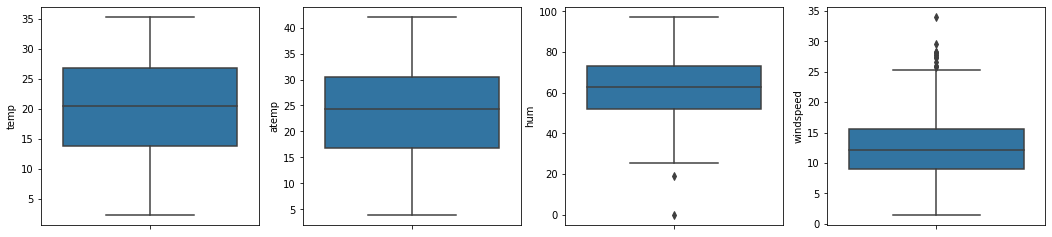

In [21]:
# Draw box plots for indepent variables with continuous values
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bike_df)
    i+=1

From these above boxplots, we can see there are no outliers so it is easy for us

# 4. Convert few columns to categorical types

In [22]:
# Convert season, eathersit, mnth, weekday to categorical types
bike_df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bike_df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

bike_df.mnth = bike_df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

bike_df.weekday = bike_df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})
bike_df.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,1600


4.1 Draw pair Plots to check the linear relationship

<Figure size 1080x2160 with 0 Axes>

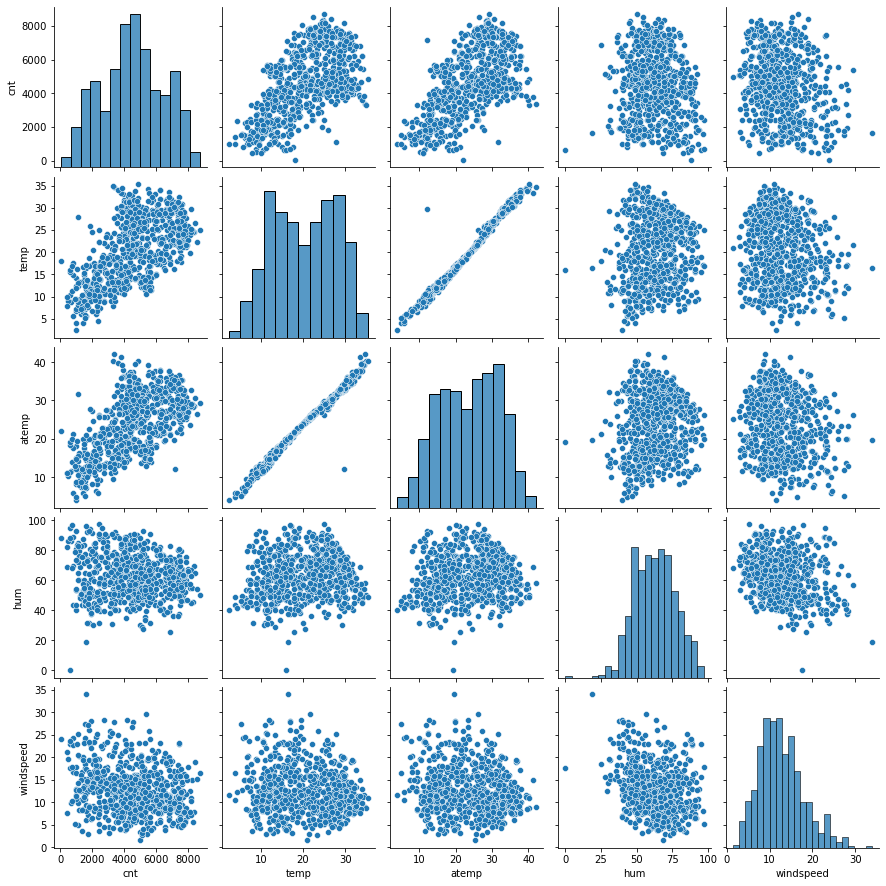

In [23]:
#Draw pairplots for continuous numeric variables using seaborn
plt.figure(figsize = (15,30))
sns.pairplot(data=bike_df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

temp and atemp are highly co-related with each other

As seen from the correlation map, output variable has a linear relationship with variables like temp, atemp.



<Figure size 1440x1080 with 0 Axes>

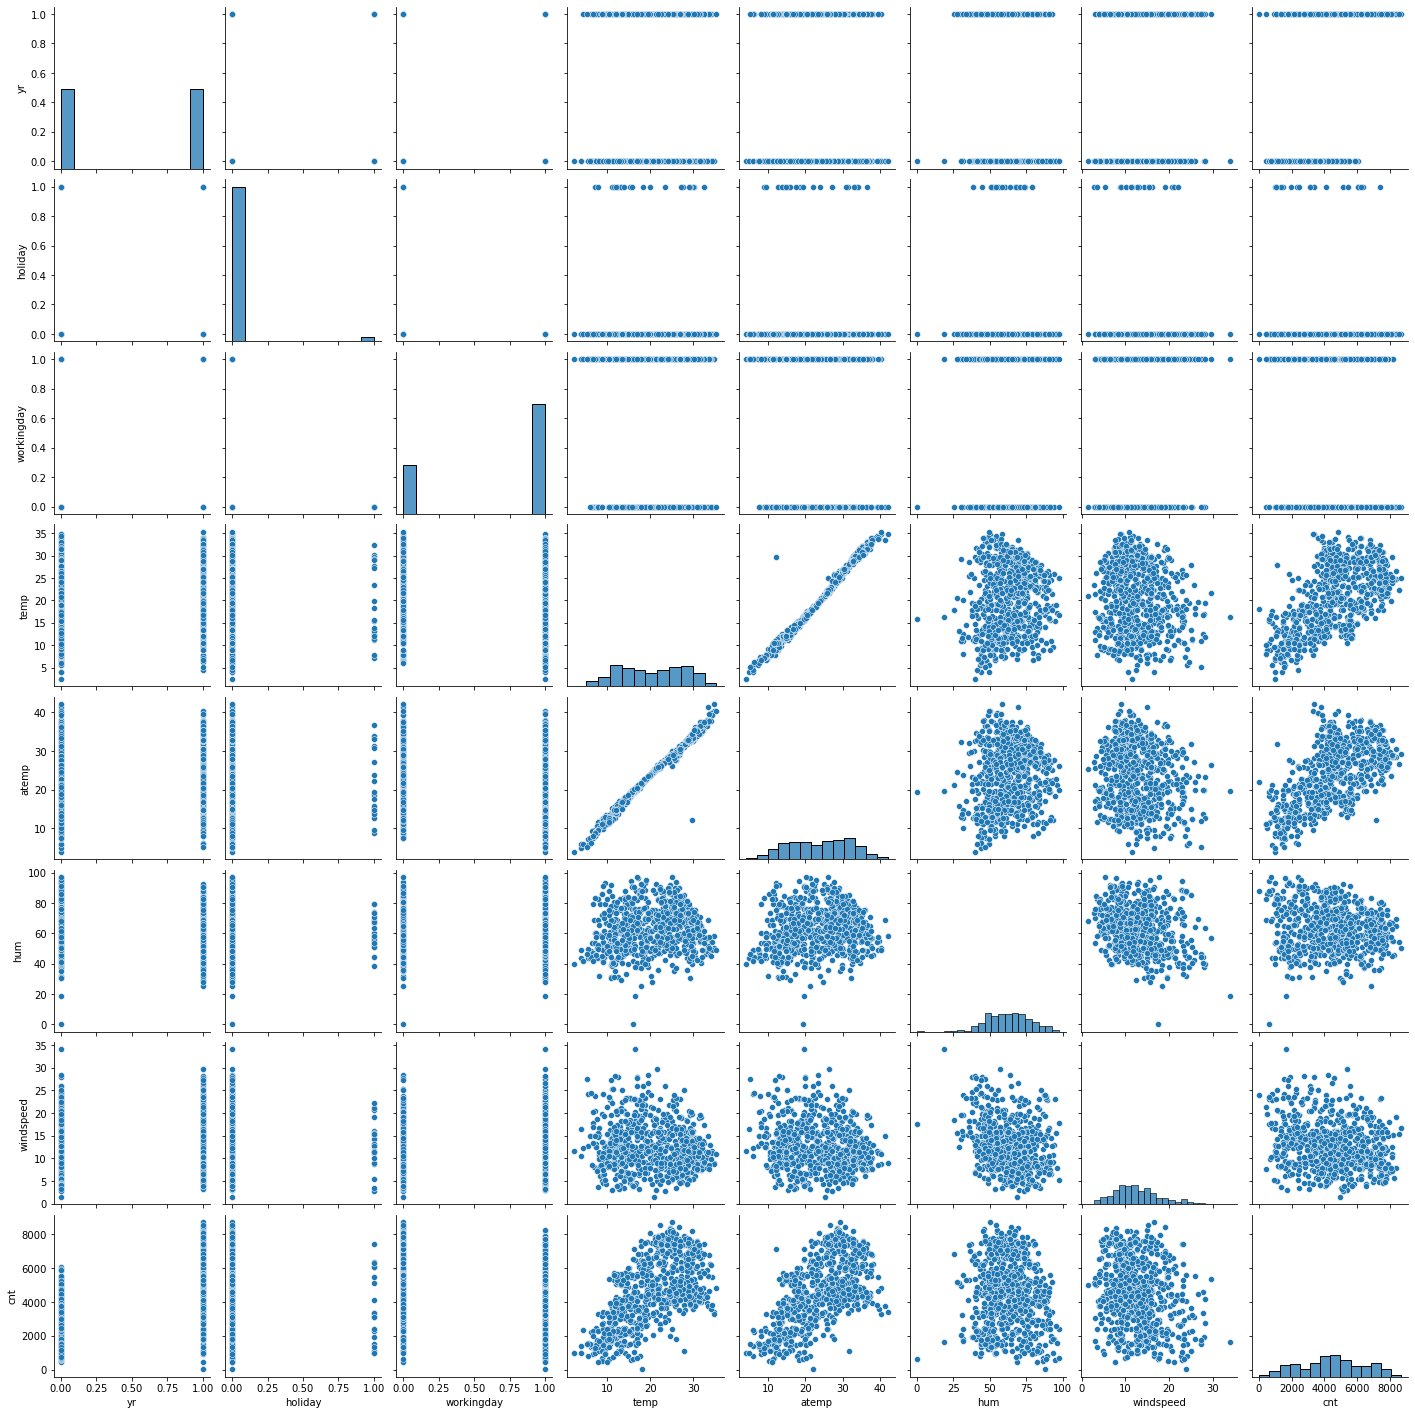

In [24]:
#Visualising the Data to Find the Correlation between the Numerical Variable#
plt.figure(figsize=(20,15))
sns.pairplot(bike_df)
plt.show()

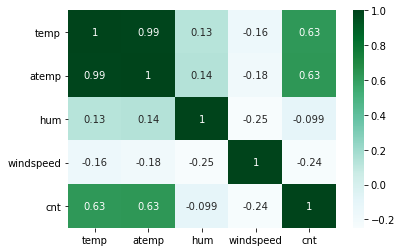

In [25]:
# Checking continuous variables relationship with each other
sns.heatmap(bike_df[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

Here we see that temp and atemp has correlation more than .99 means almost 1 (highly correlated) and atemp seems to be derived from temp so atemp field can be dropped here only

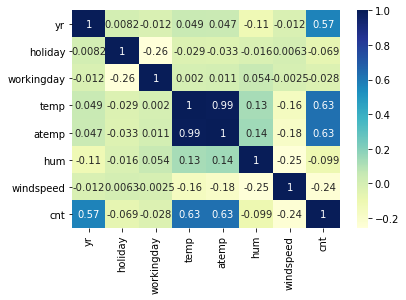

In [26]:
#Correlations for numeric variables
cor=bike_df.corr()
sns.heatmap(cor, cmap="YlGnBu", annot = True)
plt.show()


4.2 Analysing Categorical Variabels with target variables


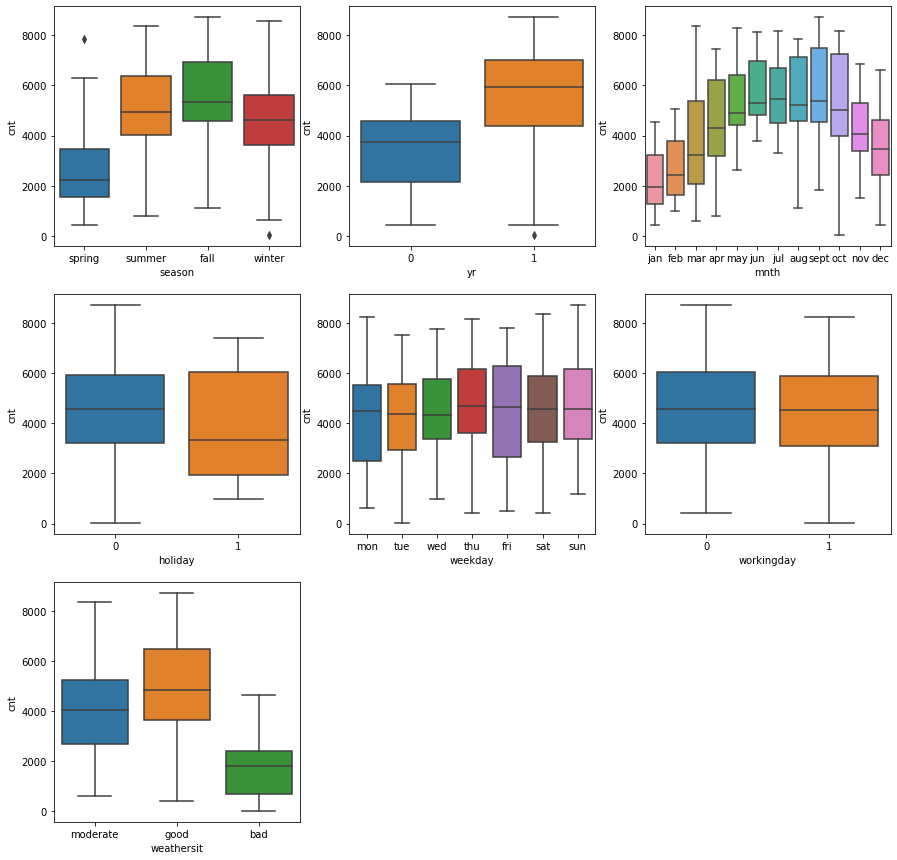

In [27]:
# Boxplot for categorical variables to see demands
vars_cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bike_df, x=i[1], y='cnt')
plt.show()

1. Season: 3:fall has highest demand for rental bikes
2. there is a demand for next year has grown
3. Demand is continuously growing each month till June. September month has highest demand. After September, demand is        decreasing
4. When there is a holiday, demand has decreased.
5. Weekday is not giving clear picture abount demand.
6. The clear weathershit has highest demand
7. During September, bike sharing is more. During the year end and beginning, it is less, could be due to extereme            weather conditions.

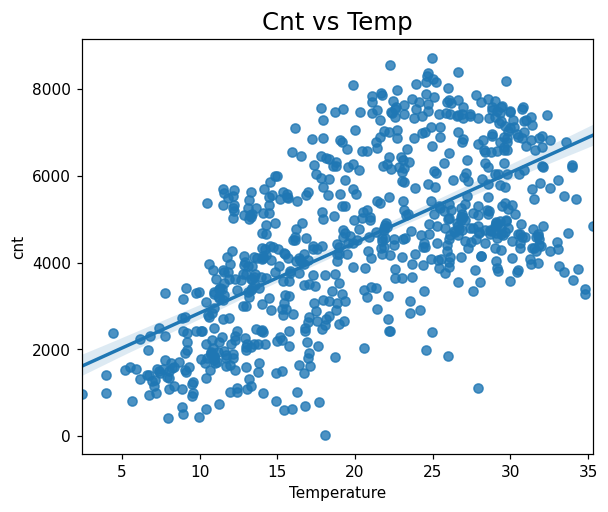

In [28]:
# plot between 'temp' colun and target variable 'cnt'
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Temp",fontsize=16)
sns.regplot(data=bike_df,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()

cnt is increasing as the temp increases

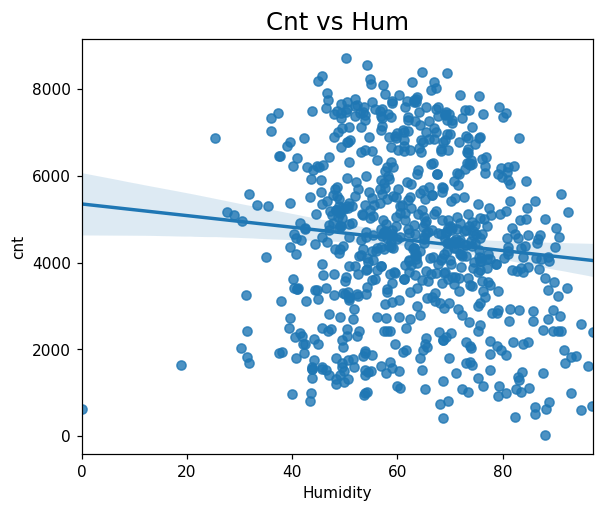

In [29]:
# plot between 'hum' colun and target variable 'cnt'
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Hum",fontsize=16)
sns.regplot(data=bike_df,y="cnt",x="hum")
plt.xlabel("Humidity")
plt.show()

               cnt is decreasing with increase in humidity

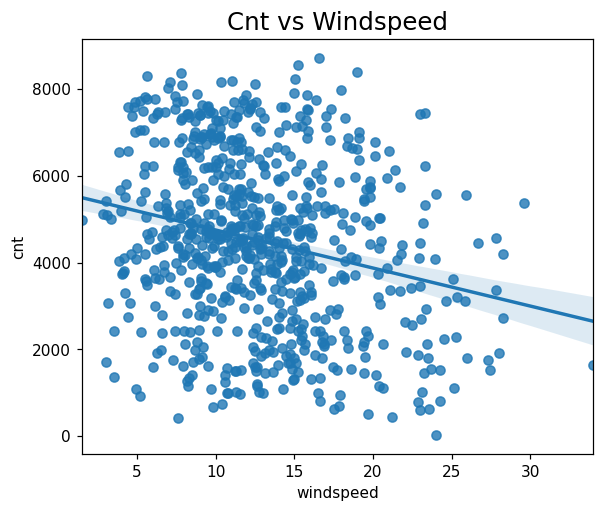

In [30]:
# plot between 'temp' colun and target variable 'cnt'
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Windspeed",fontsize=16)
sns.regplot(data=bike_df,y="cnt",x="windspeed")
plt.show()

                     cnt is decreasing with increase in windspeed

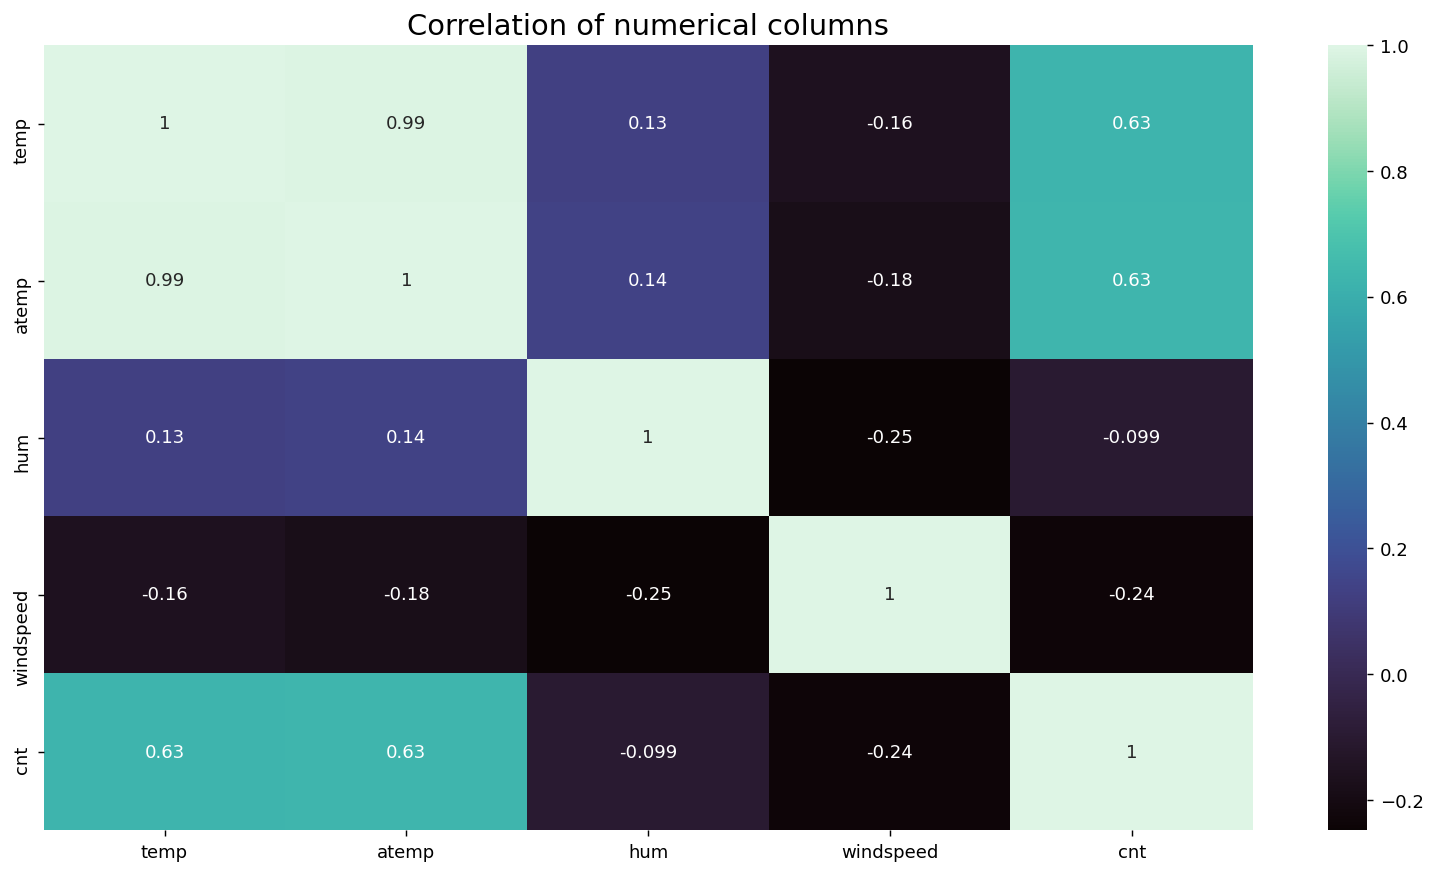

In [31]:
# correlation between numerical columns
numerical_cols = ["temp","atemp","hum","windspeed","cnt"]
plt.figure(figsize=(15,8),dpi=130)
plt.title("Correlation of numerical columns",fontsize=16)
sns.heatmap(bike_df[numerical_cols].corr(),annot= True,cmap="mako")
plt.show()

                          Temp and Atemp has high correlation with cnt variable.

# 5. preparing data for building the model

5.1 Create dummy variables for all categorical variables

In [32]:
bike_df1 = pd.get_dummies(data=bike_df,columns=["season","mnth","weekday","weathersit"],drop_first=True)


In [33]:
#Print columns after creating dummies
bike_df1.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_good', 'weathersit_moderate'],
      dtype='object')

In [34]:
#first 10 rows
bike_df1.head(10)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,1,0
5,0,0,0,8.378268,11.66045,51.8261,6.000868,1606,1,0,...,0,0,0,1,0,0,0,0,1,0
6,0,0,0,8.057402,10.44195,49.8696,11.304642,1510,1,0,...,0,0,0,0,1,0,0,0,0,1
7,0,0,1,6.765000,8.11270,53.5833,17.875868,959,1,0,...,0,0,1,0,0,0,0,0,0,1
8,0,0,1,5.671653,5.80875,43.4167,24.250650,822,1,0,...,0,0,0,0,0,0,1,0,1,0
9,0,0,1,6.184153,7.54440,48.2917,14.958889,1321,1,0,...,0,0,0,0,0,0,0,1,1,0


In [35]:
bike_df1.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_good', 'weathersit_moderate'],
      dtype='object')

# 6.Building the model

In [36]:
# Checking shape before splitting
bike_df1.shape

(730, 30)

In [37]:
bike_df1.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_good', 'weathersit_moderate'],
      dtype='object')

In [38]:
#y is the only target variable
y=bike_df1.pop('cnt')

#X is all remaining variable (independent variables)
x=bike_df1

#Train Test split with 70:30 ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

In [39]:
#checking the first five rows of x
x.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [40]:
#checking the columns of x
x.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_good', 'weathersit_moderate'],
      dtype='object')

In [41]:
# Checking shape of the train and test dataset
print(x_train.shape)
print(x_test.shape)

(511, 29)
(219, 29)


# Normalizing the data

In [42]:
# Importing required library
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [43]:
#by using MinMaxScaler normalize the x dataset
x = pd.DataFrame(MinMaxScaler().fit_transform(x),columns=x.columns)

In [44]:
#Inspect rows from Training set after scaling
x_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.499022,0.027397,0.704501,20.403120,23.839175,62.970207,12.669346,0.238748,0.256360,0.236791,...,0.091977,0.091977,0.152642,0.138943,0.133072,0.140900,0.131115,0.152642,0.630137,0.334638
std,0.500489,0.163398,0.456714,7.513416,8.143242,14.245121,5.275025,0.426736,0.437051,0.425529,...,0.289276,0.289276,0.359994,0.346226,0.339986,0.348259,0.337857,0.359994,0.483240,0.472326
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.820424,16.907525,52.812500,8.895925,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,20.807500,24.652700,63.166700,11.708518,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,26.872076,30.540125,73.083350,15.681451,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,34.781653,42.044800,97.041700,34.000021,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
x_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
466,1,0,1,16.297500,19.38020,46.6250,19.458743,0,1,0,...,0,0,0,0,0,0,0,0,1,0
96,0,0,0,17.937500,21.68480,60.2917,10.874904,0,1,0,...,0,0,0,1,0,0,0,0,1,0
432,1,0,0,16.844153,19.85415,40.7083,27.791600,1,0,0,...,0,0,0,1,0,0,0,0,0,1
687,1,0,1,15.614153,18.78105,62.3333,15.749489,0,0,1,...,0,0,0,0,0,0,1,0,0,1
507,1,0,1,25.488347,29.23060,77.4583,6.834000,0,1,0,...,0,0,0,0,0,1,0,0,0,1


# building the model

In [46]:
model = LinearRegression()

In [47]:
model.fit(x_train,y_train)

LinearRegression()

In [48]:
model.coef_

array([ 2.00028691e+03, -1.38517006e+03, -6.81284859e+02,  1.52224135e+01,
        8.75414317e+01, -1.35331131e+01, -3.65848563e+01, -8.34129203e+02,
       -1.58844965e+02,  8.34430279e+02, -3.62883043e+01, -6.95245267e+02,
       -3.29101401e+02, -4.55029906e+02, -3.89830637e+02,  1.88993584e+02,
        7.62698756e+01,  2.76326278e+02, -7.71444183e+02, -1.69998367e+02,
        5.53509255e+02, -2.73271217e+02, -7.39088688e+02, -5.11830460e+02,
        1.79373201e+00, -2.42091884e+02, -1.73574045e+02,  2.06726631e+03,
        1.52129616e+03])

In [49]:
model.intercept_

1571.8876209291075

In [50]:
y_predicted = model.predict(x_test)

In [51]:
predictedprice = pd.DataFrame({"Actual Petrol Consumption" : y_test['Petrol_Consumption'], 
                               "Predicted Petrol Consumption" : yhat, "Error" : y_test['Petrol_Consumption'] - yhat})

KeyError: 'Petrol_Consumption'

In [ ]:
predicted_cnt = pd.DataFrame({"Actual cnt": y_test,"predicted cnt": y_predicted, "Error": y_test - y_predicted })

In [ ]:
predicted_cnt

In [52]:
score = r2_score(y_test, y_predicted)
print(round(score*100, 2))

81.26


In [53]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_predicted)
print("Mean Squared Error is", mse)

Mean Squared Error is 597718.4433306374


In [54]:
rmse = np.sqrt(mse)
print("Root Mean Squared Error is", rmse)

Root Mean Squared Error is 773.1225280190957


In [55]:
y_test.describe()

count     219.000000
mean     4506.584475
std      1789.852338
min       431.000000
25%      3374.000000
50%      4401.000000
75%      5767.000000
max      8362.000000
Name: cnt, dtype: float64

In [56]:
def mape(x, y):
    return (abs((x - y) / x)).mean()

In [57]:
 s = mape(y_test, y_predicted)*100


In [58]:
print("accuracy score is", s)

accuracy score is 16.940625256052815


# Build a Model using RFE and Automated approach
# Use RFE to eliminate some columns

In [59]:
# Build a Lienar Regression model using SKLearn for RFE
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [60]:
#Cut down number of features to 15 using automated approach
rfe = RFE(model,n_features_to_select = 15)
rfe.fit(x_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [61]:
#Columns selected by RFE and their weights
list(zip(x_train.columns,rfe.support_,rfe.ranking_))


[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', False, 12),
 ('atemp', False, 9),
 ('hum', False, 14),
 ('windspeed', False, 11),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', False, 3),
 ('mnth_aug', False, 13),
 ('mnth_dec', True, 1),
 ('mnth_feb', True, 1),
 ('mnth_jan', True, 1),
 ('mnth_jul', False, 8),
 ('mnth_jun', True, 1),
 ('mnth_mar', False, 10),
 ('mnth_may', True, 1),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 2),
 ('mnth_sept', False, 4),
 ('weekday_mon', False, 5),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 15),
 ('weekday_tue', False, 6),
 ('weekday_wed', False, 7),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

# Manual elimination

 Function to build a model using statsmodel api

In [62]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    x_train_sm = sm.add_constant(x_train[cols])
    lm = sm.OLS(y_train, x_train_sm).fit()
    print(lm.summary())
    return lm

In [63]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = x_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [64]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
x_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'season_spring', 'season_summer',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jun', 'mnth_may', 'mnth_nov',
       'weekday_sat', 'weekday_sun', 'weathersit_good', 'weathersit_moderate'],
      dtype='object')

In [65]:
# Features not selected by RFE
x_train.columns[~rfe.support_]

Index(['temp', 'atemp', 'hum', 'windspeed', 'season_winter', 'mnth_aug',
       'mnth_jul', 'mnth_mar', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [66]:
# Taking 15 columns supported by RFE for regression
x_train_rfe = x_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_good', 'weathersit_moderate']]

In [67]:
x_train_rfe.shape

(511, 15)

#  Build Model
#   Model 1 - Start with all variables selected by RFE

In [68]:
#Selected columns for Model 1 - all columns selected by RFE
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_good', 'weathersit_moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     177.4
Date:                Sun, 31 Jul 2022   Prob (F-statistic):          5.06e-188
Time:                        14:50:49   Log-Likelihood:                -4134.5
No. Observations:                 511   AIC:                             8301.
Df Residuals:                     495   BIC:                             8369.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 605.2090    

# model2

In [69]:
# Dropping the variable mnth_jan as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_good', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Sun, 31 Jul 2022   Prob (F-statistic):          4.29e-189
Time:                        14:50:53   Log-Likelihood:                -4134.7
No. Observations:                 511   AIC:                             8299.
Df Residuals:                     496   BIC:                             8363.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 576.2499    

# model 3:

In [70]:
# droping the columns 'mnth_jul','holiday','windspeed','season_spring','sason_summer','weekday_saturday','workingday'
# because these columns have negative coefficients so
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_good', 'weathersit_moderate', 'temp']


build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     260.8
Date:                Sun, 31 Jul 2022   Prob (F-statistic):          1.02e-182
Time:                        14:50:55   Log-Likelihood:                -4163.9
No. Observations:                 511   AIC:                             8348.
Df Residuals:                     501   BIC:                             8390.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1363.4218    

Here VIF seems to be almost accepted. p-value for all the features is almost 0.0 and R^2 is 0.824 Let us select Model 3 as our final as it has all important statistics high (R-square, Adjusted R-squared and F-statistic), along with no insignificant variables and no multi coliinear (high VIF) variables. Difference between R-squared and Adjusted R-squared values for this model is veryless, which also means that there are no additional parameters that can be removed from this model.

In [94]:
#Build a model with all columns to select features automatically
def build_models(x,y):
    model1 = LinearRegression()
    model1.fit(x,y)
    return model1

In [96]:
#Let us build the finalmodel using sklearn
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_good', 'weathersit_moderate', 'temp']

#Build a model with above columns
model1 = build_models(x_train,y_train)
print(model1.intercept_,model1.coef_)

1571.8876209291075 [ 2.00028691e+03 -1.38517006e+03 -6.81284859e+02  1.52224135e+01
  8.75414317e+01 -1.35331131e+01 -3.65848563e+01 -8.34129203e+02
 -1.58844965e+02  8.34430279e+02 -3.62883043e+01 -6.95245267e+02
 -3.29101401e+02 -4.55029906e+02 -3.89830637e+02  1.88993584e+02
  7.62698756e+01  2.76326278e+02 -7.71444183e+02 -1.69998367e+02
  5.53509255e+02 -2.73271217e+02 -7.39088688e+02 -5.11830460e+02
  1.79373201e+00 -2.42091884e+02 -1.73574045e+02  2.06726631e+03
  1.52129616e+03]


# Model Evaluation

# Residucal Analysis

In [97]:
y_train_pred = model1.predict(x_train)

In [98]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

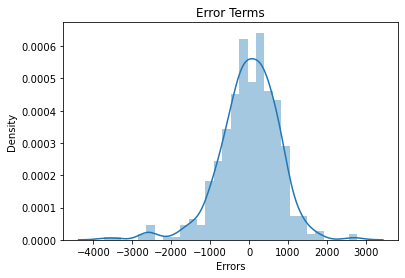

In [99]:
plot_res_dist(y_train, y_train_pred)


Errors are normally distribured here with mean 0. So everything seems to be fine


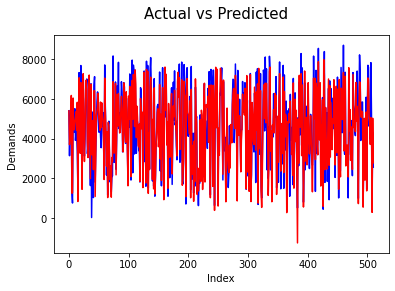

In [100]:
# Actual vs Predicted
c = [i for i in range(0,len(x_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

Actual and Predicted result following almost the same pattern so this model seems ok


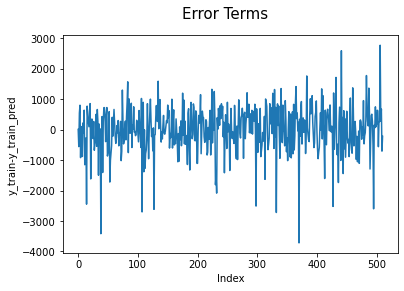

In [101]:
# Error Terms
c = [i for i in range(0,len(x_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()


Here,If we see the error terms are independent of each other.


In [102]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8533118636064592

# R^2 is obtained for the funal model is same

# * Linearity Check

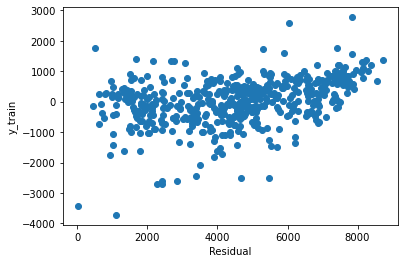

In [103]:
# scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()


#  Predict values for test data set

In [80]:
#Scale variables in x_test
num_vars = ['temp','atemp','hum','windspeed']

#Test data to be transformed only, no fitting
x_test[num_vars] = MinMaxScaler.transform(x_test[num_vars])

TypeError: transform() missing 1 required positional argument: 'X'

In [104]:
#Columns from our final model
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_good', 'weathersit_moderate', 'temp']

#Predict the values for test data
y_test_pred = model1.predict(x_test)

R-Squared value for test predictions

In [105]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.8125653535354591

# homosedacity

R2 value for predictions on test data (0.815) is almost same as R2 value of train data(0.818). This is a good R-squared value, hence we can see our model is performing good even on unseen data (test data)

Text(0, 0.5, 'y_test_pred')

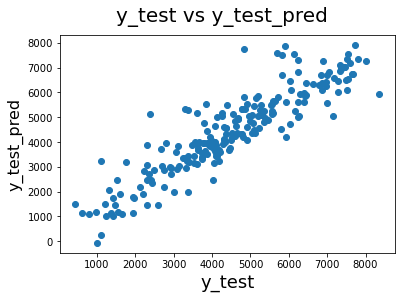

In [106]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

We can observe that variance of the residuals (error terms) is constant across predictions. i.e error term does not vary much as the value of the predictor variable changes.

# Plot Test vs Predicted test values

In [107]:
#Function to plot Actual vs Predicted
#Takes Actual and PRedicted values as input along with the scale and Title to indicate which data
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                               # X-label
    plt.ylabel('Counts', fontsize=16)                               # Y-label

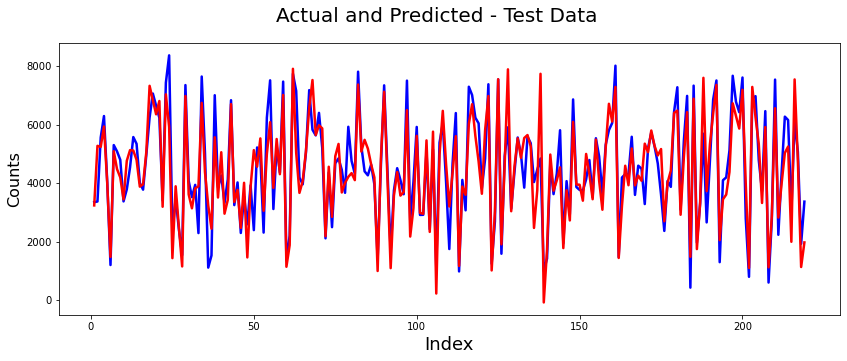

In [108]:
#Plot Actual vs Predicted for Test Data
plot_act_pred(y_test,y_test_pred,len(y_test)+1,'Test Data')

# Plot Error Terms for test data

In [109]:
# Error terms
def plot_err_terms(act,pred):
    c = [i for i in range(1,220,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act-pred, color="blue", marker='o', linewidth=2.5, linestyle="")
    fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                      # X-label
    plt.ylabel('Counts - Predicted Counts', fontsize=16)                # Y-label

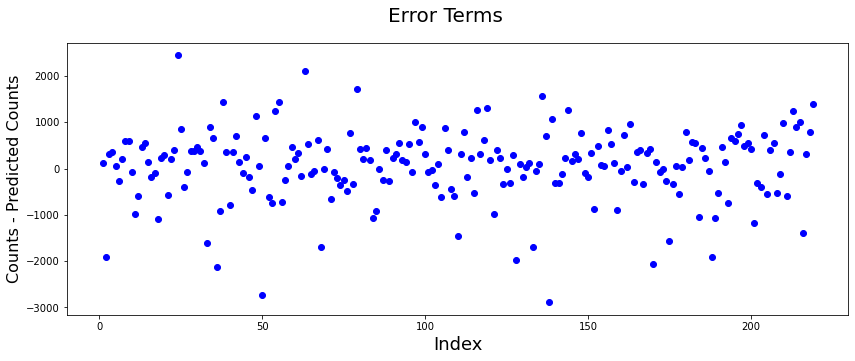

In [110]:
#Plot error terms for test data
plot_err_terms(y_test,y_test_pred)

As we can see the error terms are randomly distributed and there is no pattern which means the output is explained well by the model and there are no other parameters that can explain the model better.

# Conclusion

Significant variables to predict the demand for shared bikes

holiday
temp
hum
windspeed
Season
months(January, July, September, November, December)
Year (2019)
Sunday
weathersit( Light Snow, Mist + Cloudy)